# SMART METER LONDON

In [1]:
# Plotting
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sbn
rcParams['figure.figsize'] = 15, 6

# ignore warnings in this demo notebook
import warnings; warnings.simplefilter('ignore')

from datetime import datetime
import pandas as pd
import numpy as np

from python_code.data_preparation import load_series

## Data Description

A detailed data description can be found on Kaggle: [Kaggle: Smart Meters in London](https://www.kaggle.com/jeanmidev/smart-meters-in-london).

### Data Description

You may have to modify the data preparation file (*00_load_smart_meter_data.R*) when applying this code to your own data. 

- Number of series: 4961
- Date range: 2013-10-30 00:00:00 CET to 2014-02-27 23:00:00 CET (121 days)

In [2]:
data_path = 'prepared_data/london_smart_meter/'
file = 'smart_meters_london_cleaned_same_start.csv'
params = {'column_sort': 'date_time'}

df = load_series(data_path, file, params)
df.index = df.index.tz_localize('UCT').tz_convert('Etc/GMT-1')

The data was saved with `write_csv` from the `readr` package. Date variables are saved in UTC time zone. Therefore, we have to realign the date column. 

In [3]:
df.head()

,id,energy
date,,
2013-10-30 00:00:00+01:00,MAC000002,0.457
2013-10-30 01:00:00+01:00,MAC000002,0.414
2013-10-30 02:00:00+01:00,MAC000002,0.408
2013-10-30 03:00:00+01:00,MAC000002,0.352
2013-10-30 04:00:00+01:00,MAC000002,0.250


In [4]:
uniqueIDs = df['id'].unique()
len(uniqueIDs)

4961

In [7]:
df.groupby('id').describe()

energy                                                             
            count      mean       std    min      25%     50%      75%     max
id                                                                            
MAC000002  2904.0  0.588173  0.526631  0.186  0.21400  0.4430  0.81300   4.421
MAC000003  2904.0  0.772168  1.120218  0.072  0.18300  0.3000  0.52100   5.765
MAC000004  2904.0  0.072590  0.087505  0.000  0.00000  0.0000  0.16800   0.329
MAC000005  2904.0  0.224864  0.250015  0.020  0.06300  0.1480  0.27600   3.119
MAC000006  2904.0  0.139899  0.093481  0.031  0.06600  0.1140  0.18900   1.194
MAC000007  2904.0  0.447966  0.496381  0.035  0.14000  0.2770  0.56125   6.739
MAC000009  2904.0  0.398735  0.319739  0.076  0.17375  0.3280  0.48925   2.421
MAC000010  2904.0  1.229187  0.915554  0.234  0.49500  0.9530  1.66200   5.869
MAC000011  2904.0  0.557905  0.389587  0.129  0.26400  0.4570  0.72525   3.064
MAC000012  2904.0  0.102632  0.174547  0.000  0.01500  0.0590  0.10300   2.260
MAC000013  2904.0  0.203659  0.114251  0.048  0.12400  0.1790  0.25000   0.835
MAC000014  2904.0  0.316857  0.388672  0.015  0.06400  0.2305  0.36100   2.693
MAC000015  2904.0  0.489587  0.495108  0.000  0.22500  0.3090  0.52500   5.135
MAC000017  2904.0  0.307564  0.288595  0.063  0.13300  0.2140  0.37525   3.298
MAC000018  2904.0  0.353880  0.269634  0.189  0.21700  0.2405  0.37425   3.022
MAC000019  2904.0  0.282108  0.235153  0.052  0.13100  0.2020  0.37000   2.278
MAC000020  2904.0  0.321799  0.286480  0.065  0.12500  0.2500  0.39225   2.635
MAC000021  2904.0  1.019230  0.458693  0.589  0.75400  0.8360  1.02325   5.088
MAC000022  2904.0  0.774968  0.281020  0.000  0.67300  0.7580  0.99200   2.534
MAC000023  2904.0  0.658557  0.593389  0.091  0.20100  0.4160  0.99125   3.497
MAC000024  2904.0  1.061392  1.156747  0.062  0.21800  0.4725  1.72650   6.755
MAC000025  2904.0  0.208802  0.392278  0.009  0.03200  0.0820  0.18425   3.476
MAC000026  2904.0  0.557123  0.497741  0.200  0.26700  0.3210  0.69550   4.558
MAC000027  2904.0  0.341747  0.205675  0.000  0.18400  0.2990  0.43800   2.466
MAC000029  2904.0  0.129291  0.188930  0.000  0.05600  0.1100  0.11900   2.513
MAC000030  2904.0  0.556100  0.576610  0.097  0.21700  0.3520  0.63700   5.284
MAC000031  2904.0  1.082098  0.984153  0.151  0.30000  0.7380  1.55225   6.196
MAC000032  2904.0  0.704666  1.184562  0.000  0.07400  0.1440  0.39625   6.399
MAC000033  2904.0  0.310499  0.198404  0.076  0.15900  0.2910  0.39100   2.101
MAC000034  2904.0  1.658447  2.803835  0.000  0.20500  0.3380  1.19575  12.284
...           ...       ...       ...    ...      ...     ...      ...     ...
MAC005528  2904.0  0.177566  0.112674  0.000  0.08000  0.1710  0.24300   0.700
MAC005529  2904.0  0.314411  0.386665  0.018  0.04000  0.1360  0.65000   3.179
MAC005530  2904.0  0.491024  0.367035  0.044  0.13100  0.4970  0.74625   2.787
MAC005532  2904.0  0.506545  0.442389  0.141  0.21700  0.3030  0.73100   4.151
MAC005533  2904.0  0.567053  0.452527  0.108  0.23400  0.5130  0.69500   3.935
MAC005534  2904.0  0.329258  0.397725  0.100  0.13700  0.2010  0.34900   3.337
MAC005535  2904.0  0.169795  0.159621  0.085  0.09500  0.1090  0.17000   1.710
MAC005536  2904.0  0.041386  0.033579  0.000  0.02400  0.0280  0.05000   0.191
MAC005537  2904.0  0.355920  0.348071  0.000  0.06200  0.2250  0.57100   2.075
MAC005538  2904.0  0.175384  0.221067  0.019  0.02500  0.0760  0.25700   2.272
MAC005539  2904.0  0.734493  0.489680  0.180  0.38300  0.6265  0.92825   4.046
MAC005540  2904.0  0.185543  0.214948  0.000  0.09100  0.1010  0.20825   1.884
MAC005541  2904.0  0.827796  0.708966  0.161  0.38575  0.5425  0.95000   7.019
MAC005543  2904.0  0.902330  0.206429  0.069  0.77000  0.8840  1.01625   2.631
MAC005544  2904.0  0.167684  0.092958  0.012  0.10400  0.1630  0.21100   0.986
MAC005545  2904.0  1.737845  0.840219  0.030  1.50300  1.6890  2.10625   5.594
MAC005546  2904.0  0.277363  0.134816  0.101  0.22800  0.2630

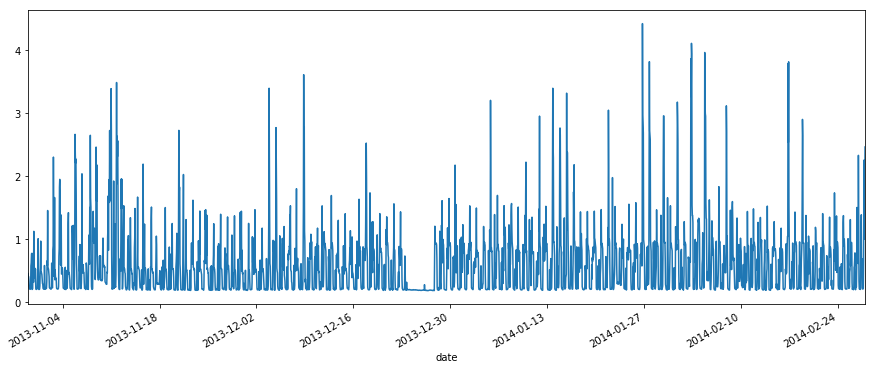

In [8]:
df[df['id'] == 'MAC000002']['energy'].plot()

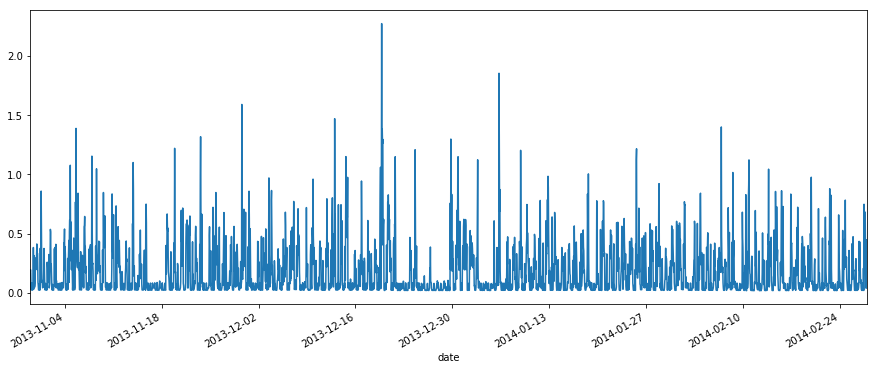

In [9]:
df[df['id'] == 'MAC005538']['energy'].plot()

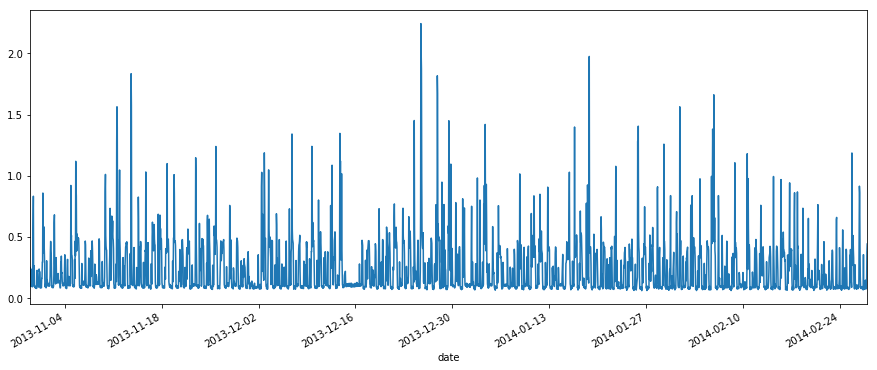

In [10]:
df[df['id'] == 'MAC005567']['energy'].plot()